### Lecture-03 Gradient Descent and Dymanic Programming
### In this week, we need complete following tasks:

Re-review the course online programming;
Choose 1 - 2 books which you interested and keep reading;

Answer the review questions
Prepare the basic requirement of our 1st project.

#### Part I Review the online programming.
#### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.
#### Part 3: Finish the Solution Parse Part of Edit-Distance
#### Part 4 Choose 1 - 2 books to keep reading:
- SICP, Structure and Interpretation of Computer Programming.
- Introduction to Algorithms
- Artificial Intelligence A Modern Approach (3rd Edition)
- Code Complete 2
- Programming Pearls
- Deep Learning
- 黑客与画家
- 数学之美
- Fluent Python
- Hands on Tensorflow
- Conference: NIPS ICML ICLR ACL AAAI
- most books you may find in our github: https://github.com/Computing-Intelligence/References

#### Part 5-1: review machine learning
Why do we use Derivative / Gredient to fit a target function?¶
Ans:

In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶
Ans:

What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans:

Using the simple words to describe: What's the machine leanring.¶
Ans:

#### Part 5-2 : Answer following questions:
Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?
Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?
Can you catch up at least 3 problems which could solved by Dynamic Programming?
Can you catch up at least 3 problems wich could sloved by Edit Distance?
Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.
What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

#### Part 6 Preparation of Project-01
Using python Flask or Bottle to finish your first simple web app:

https://bottlepy.org/

Learn what's the SQL, and try some simple SQL operations:

https://www.w3schools.com/sql/sql_intro.asp

Learn what's the HTML ( ONLY need to know the basic things)

https://getbootstrap.com/; https://www.w3schools.com/html/

(Optinal) Finish the k-person-salesman problem:

### Part I Review the online programming.

In [ ]:
#Dynamic Programming 切钢筋的问题引入 

In [ ]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [29]:
price = {}

In [31]:
for i,p in enumerate(original_price):
    price[i+1] = p

In [32]:
price

{1: 1, 2: 5, 3: 8, 4: 9, 5: 10, 6: 17, 7: 17, 8: 20, 9: 24, 10: 30}

In [33]:
price[3]

8

In [34]:
price[11]

KeyError: 11

In [35]:
from collections import defaultdict
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
price = defaultdict(lambda:"None")  # = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p

In [37]:
price[3]

8

In [38]:
price[33]

'None'

In [39]:
from collections import defaultdict
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
price = defaultdict(lambda:"None")  # = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p
#assert price[1] == 1

In [49]:
price

defaultdict(<function __main__.<lambda>()>,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             132: 'None'})

In [41]:
price[3]

8

In [42]:
price[132]

'None'

In [59]:
called_time = defaultdict(int)
def get_call_times(f):
    result = f()
    print("function:{} called once!".format(f.__name__))
    called_time[f.__name__] +=1 
    return result

In [60]:
def some_function_1(): print("I am function")

In [61]:
some_function_1()

I am function


In [64]:
def example(f,arg):
    return f(arg)

In [66]:
def add_ten(num):
    return num + 10

In [68]:
example(add_ten,100)

110

In [73]:
def mul_ten(num):
    return num * (10)

In [77]:
operations = [add_ten , mul_ten]
for f in operations:
    print(example(f,100))

110
1000


In [91]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print("function:{} called once!".format(f.__name__))
    called_time[f.__name__] += 1 
    
    return result

In [92]:
def some_function_1():  print("I am function 1")

In [93]:
get_call_time(some_function_1)

<function __main__.some_function_1()>

In [44]:
def func_1(n):
    for i in range(n):
        print(n)

In [45]:
def call_time(func_1,arg):
    start  = time.time()
    func_1(arg)
    print("used time: {}".format(time.time() - start))

In [46]:
from functools import wraps
import time

#### 装饰器的用法

In [94]:
function_called_time = defaultdict(int)
def get_call_time(func):
    @wraps(func)
    def _inner(arg):    ## *args, **kwargs
        """It's inner function"""
        global function_called_time
        function_called_time[func.__name__] += 1
        result = func(arg)
        print('function called time is : {}'.format(function_called_time[func.__name__]))
        return result
    return _inner

In [97]:
call_time(func_1, 10)

10
10
10
10
10
10
10
10
10
10
used time: 0.0


In [12]:
func_1 = get_call_time(func_1)

In [13]:
func_1(10)

10
10
10
10
10
10
10
10
10
10
function called time is : 1


In [14]:
@ get_call_time
def func_1(n):
    for i in range(n):
        print(n)
    return 0

In [15]:
func_1(10)

10
10
10
10
10
10
10
10
10
10
function called time is : 2


0

In [16]:
@get_call_time
def func_slow(n):
    for i in range(n):
        time.sleep(0.2)
        print(n)

In [17]:
call_time(func_slow, 1)

1
function called time is : 1
used time: 0.20061349868774414


In [18]:
func_slow(1)

1
function called time is : 2


In [19]:
func_slow(5)

5
5
5
5
5
function called time is : 3


In [20]:
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n):
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result 
    return _wrap

In [21]:
@memo
def r(n):
    max_price, split_point = max(
    [(price[n] , 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key = lambda x : x[0]
    )
    solution[n] = (split_point, n- split_point)
    return max_price

In [22]:
r(231)

691

In [23]:
r(300)

900

In [24]:
r(900)

2700

### Edit Distance

In [ ]:

solution = {}
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.


### Part 3: Finish the Solution Parse Part of Edit-Distance


### Part 4 Choose 1 - 2 books to keep reading:

In [ ]:
about the book , I choose the "黑客与画家" first. 

### Part 5-1: review machine learning

In [ ]:
Why do we use Derivative / Gredient to fit a target function?
为了能更准确 更快速的找到目标目标函数的最小值。

In the words 'Gredient Descent', what's the Gredient and what's the Descent?
梯度的提出只为了回答一个问题： 函数在变量空间的某一点处，沿着哪一个方向有最大的变化率。梯度的
梯度是一个向量， 它的方向在所有方向的导数中，最大的方向导数的方向， 它的模为方向导数的的最大值。
也可以这样理解，梯度即函数在某一点最大的方向导数，沿着梯度方向， 函数具有最大的变化率。

既然梯度是所有方向导数中最大的方向导数，具有最大的变化率，那么我们沿着梯度方向走，就可以最快的达到函数的最大值。
在损失函数优化的过程中，我们希望取得函数的最小值，那么自然就是沿着梯度的负方向走。 
What's the advantages of the 3rd gradient descent method compared to the previous methods? 


Using the simple words to describe: What's the machine leanring.

从数据中学习到规律，从而拟合出一个函数来。


### Part 5-2 : Answer following questions:

In [ ]:
Why do we need dynamic programming?


What's the difference of dynamic programming and previous talked search problme?


Why do we still need dynamic programming? 


Why not we train a machine learning to fit a function which could get the right answer based on inputs? 


Can you catch up at least 3 problems which could solved by Dynamic Programming? 


Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 


What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)



### Part 6 Preparation of Project-01

Using python Flask or Bottle to finish your first simple web app:

https://bottlepy.org/

Learn what's the SQL, and try some simple SQL operations:

https://www.w3schools.com/sql/sql_intro.asp

Learn what's the HTML ( ONLY need to know the basic things)

https://getbootstrap.com/; https://www.w3schools.com/html/

(Optinal) Finish the k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

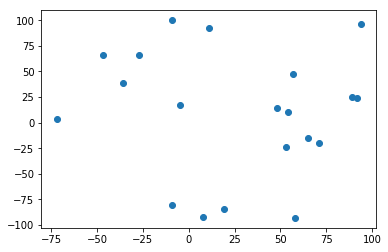

In [3]:
plt.scatter(latitudes, longitude) 

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?
例如：

In [4]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [5]:
import matplotlib.pyplot as plt

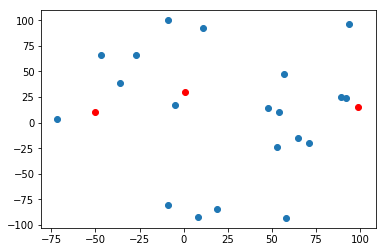

In [6]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')